In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('traffic.csv')

In [3]:
df

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [4]:
# 1. Total and Daily Pageview Events

In [5]:
pageview = df[df['event'] == 'pageview']

In [6]:
totalpageviews = pageview.shape[0]

In [7]:
pageview['date'] = pd.to_datetime(pageview['date'])

C:\Users\iaman\AppData\Local\Temp\ipykernel_16868\2628343424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pageview['date'] = pd.to_datetime(pageview['date'])


In [8]:
pageview

,event,date,country,city,artist,album,track,isrc,linkid
84043,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,2021-08-19,United States,Absecon,KA$HDAMI,epiphany,Reparations!,QZFYY2115255,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,pageview,2021-08-19,Ireland,Mullingar,Cardi B,Up,Up,USAT22100061,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,pageview,2021-08-19,United Kingdom,Northampton,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [9]:
dailypageviews = pageview.groupby(pageview['date'].dt.date).size()

In [10]:
avg_pageviews = dailypageviews.mean()
avg_pageviews

20287.85714285714

In [11]:
totalpageviews, avg_pageviews

(142015, 20287.85714285714)

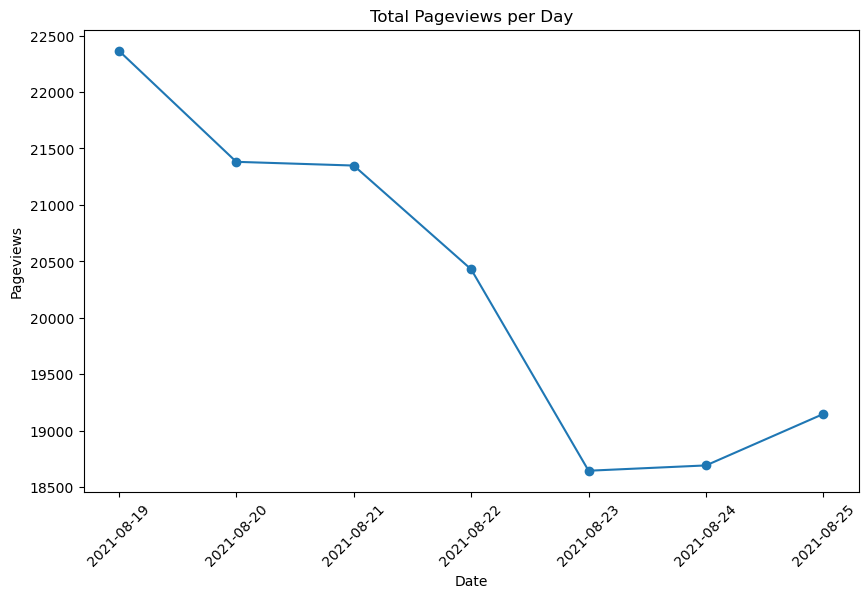

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(dailypageviews.index, dailypageviews.values, marker='o')
plt.title('Total Pageviews per Day')
plt.xlabel('Date')
plt.ylabel('Pageviews')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 2. Analysis Of Other Events

In [14]:
other_events = df['event'].value_counts()

In [15]:
other_events

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

In [16]:
total_other_events = other_events[1] + other_events[2]

C:\Users\iaman\AppData\Local\Temp\ipykernel_16868\522062904.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_other_events = other_events[1] + other_events[2]


In [17]:
total_other_events

84263

C:\Users\iaman\AppData\Local\Temp\ipykernel_16868\4283310961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=other_events.index, y=other_events.values, palette='Blues_d')


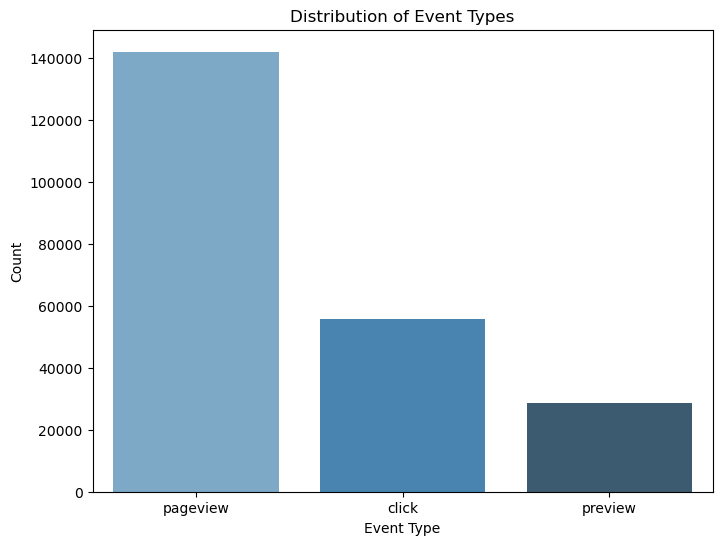

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=other_events.index, y=other_events.values, palette='Blues_d')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [19]:
# 3. Geographical Distribution

In [20]:
geo_dist = pageview['country'].value_counts()

In [21]:
geo_dist

country
Saudi Arabia         28873
India                27286
United States        20839
France                9674
Iraq                  4897
                     ...  
Wallis and Futuna        1
Solomon Islands          1
Guinea-Bissau            1
Lesotho                  1
Saint Martin             1
Name: count, Length: 211, dtype: int64

C:\Users\iaman\AppData\Local\Temp\ipykernel_16868\1718175617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_dist.head(10).index, y=geo_dist.head(10).values, palette='Purples_d')


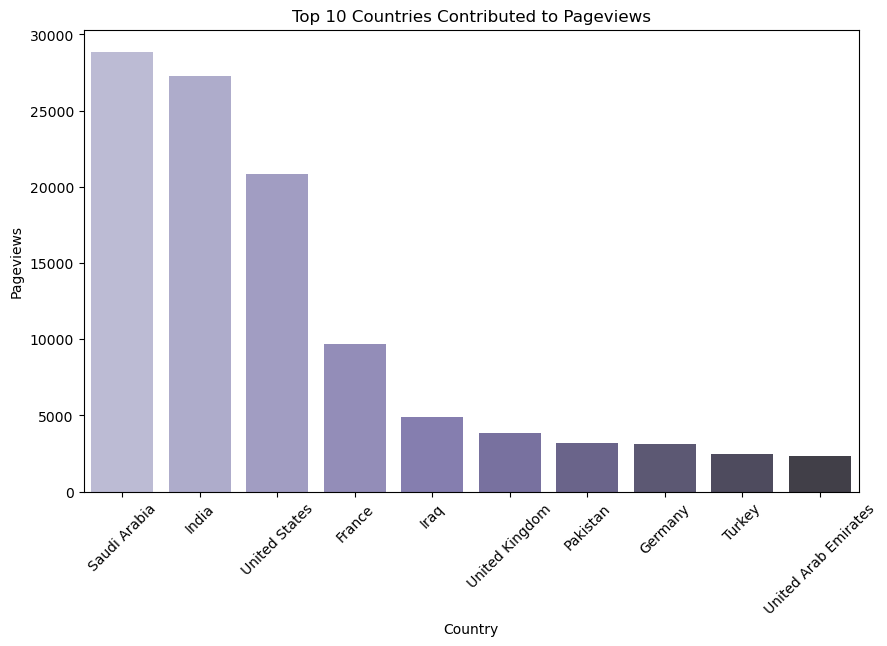

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_dist.head(10).index, y=geo_dist.head(10).values, palette='Purples_d')
plt.title('Top 10 Countries Contributed to Pageviews')
plt.xlabel('Country')
plt.ylabel('Pageviews')
plt.xticks(rotation=45)
plt.show()

In [23]:
#4. Click-Through Rate (CTR) analysis

In [24]:
overall_ctr = other_events[1]/other_events[0]

C:\Users\iaman\AppData\Local\Temp\ipykernel_16868\2913759854.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overall_ctr = other_events[1]/other_events[0]


In [25]:
overall_ctr

0.3924374185825441

In [26]:
clicks = df[df['event'] == 'click']

In [27]:
totalpageviews

142015

In [28]:
pageview_count_per_link = pageview.groupby('linkid').size().reset_index(name='pageviews')

In [29]:
click_count_per_link = clicks.groupby('linkid').size().reset_index(name='clicks')

In [30]:
ctr_data = pd.merge(pageview_count_per_link, click_count_per_link, on='linkid',suffixes=('_pageviews','_clicks'))

In [31]:
ctr_data

,linkid,pageviews,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,3,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,36,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,4,3
...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,84,29
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,2,1


In [32]:
ctr_data['CTR'] = ctr_data['clicks']/ctr_data['pageviews']

In [33]:
ctr_data_sorted = ctr_data.sort_values(by='CTR',ascending=False)

In [34]:
ctr_data_sorted

,linkid,pageviews,clicks,CTR
1789,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,10,923,92.300000
470,330773a6-f22a-5c7a-a3e4-7809fe8539b9,1,3,3.000000
371,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,1,3,3.000000
1739,c2d99bb2-6ea3-568c-80d3-44dc36250cbc,1,2,2.000000
172,132c744a-d87b-5ed6-aff2-d9b8c718a4ea,1,2,2.000000
...,...,...,...,...
1136,7cf99126-2092-4b29-bdf9-a2f8ad5500ed,8,1,0.125000
1009,6e6c1939-9d37-450e-aec1-2af09140bc33,11,1,0.090909
1004,6dacffe9-779d-4e9b-94dd-a3e811b2983e,11,1,0.090909
324,229f278b-f052-57e7-813d-15d25f226723,11,1,0.090909


In [35]:
low_ctr_links = ctr_data[ctr_data['CTR'] < 0.1]

In [36]:
low_ctr_links

,linkid,pageviews,clicks,CTR
324,229f278b-f052-57e7-813d-15d25f226723,11,1,0.090909
1004,6dacffe9-779d-4e9b-94dd-a3e811b2983e,11,1,0.090909
1009,6e6c1939-9d37-450e-aec1-2af09140bc33,11,1,0.090909
1238,899f223b-55f0-5f5a-8351-3ea64d0ce29f,11,1,0.090909


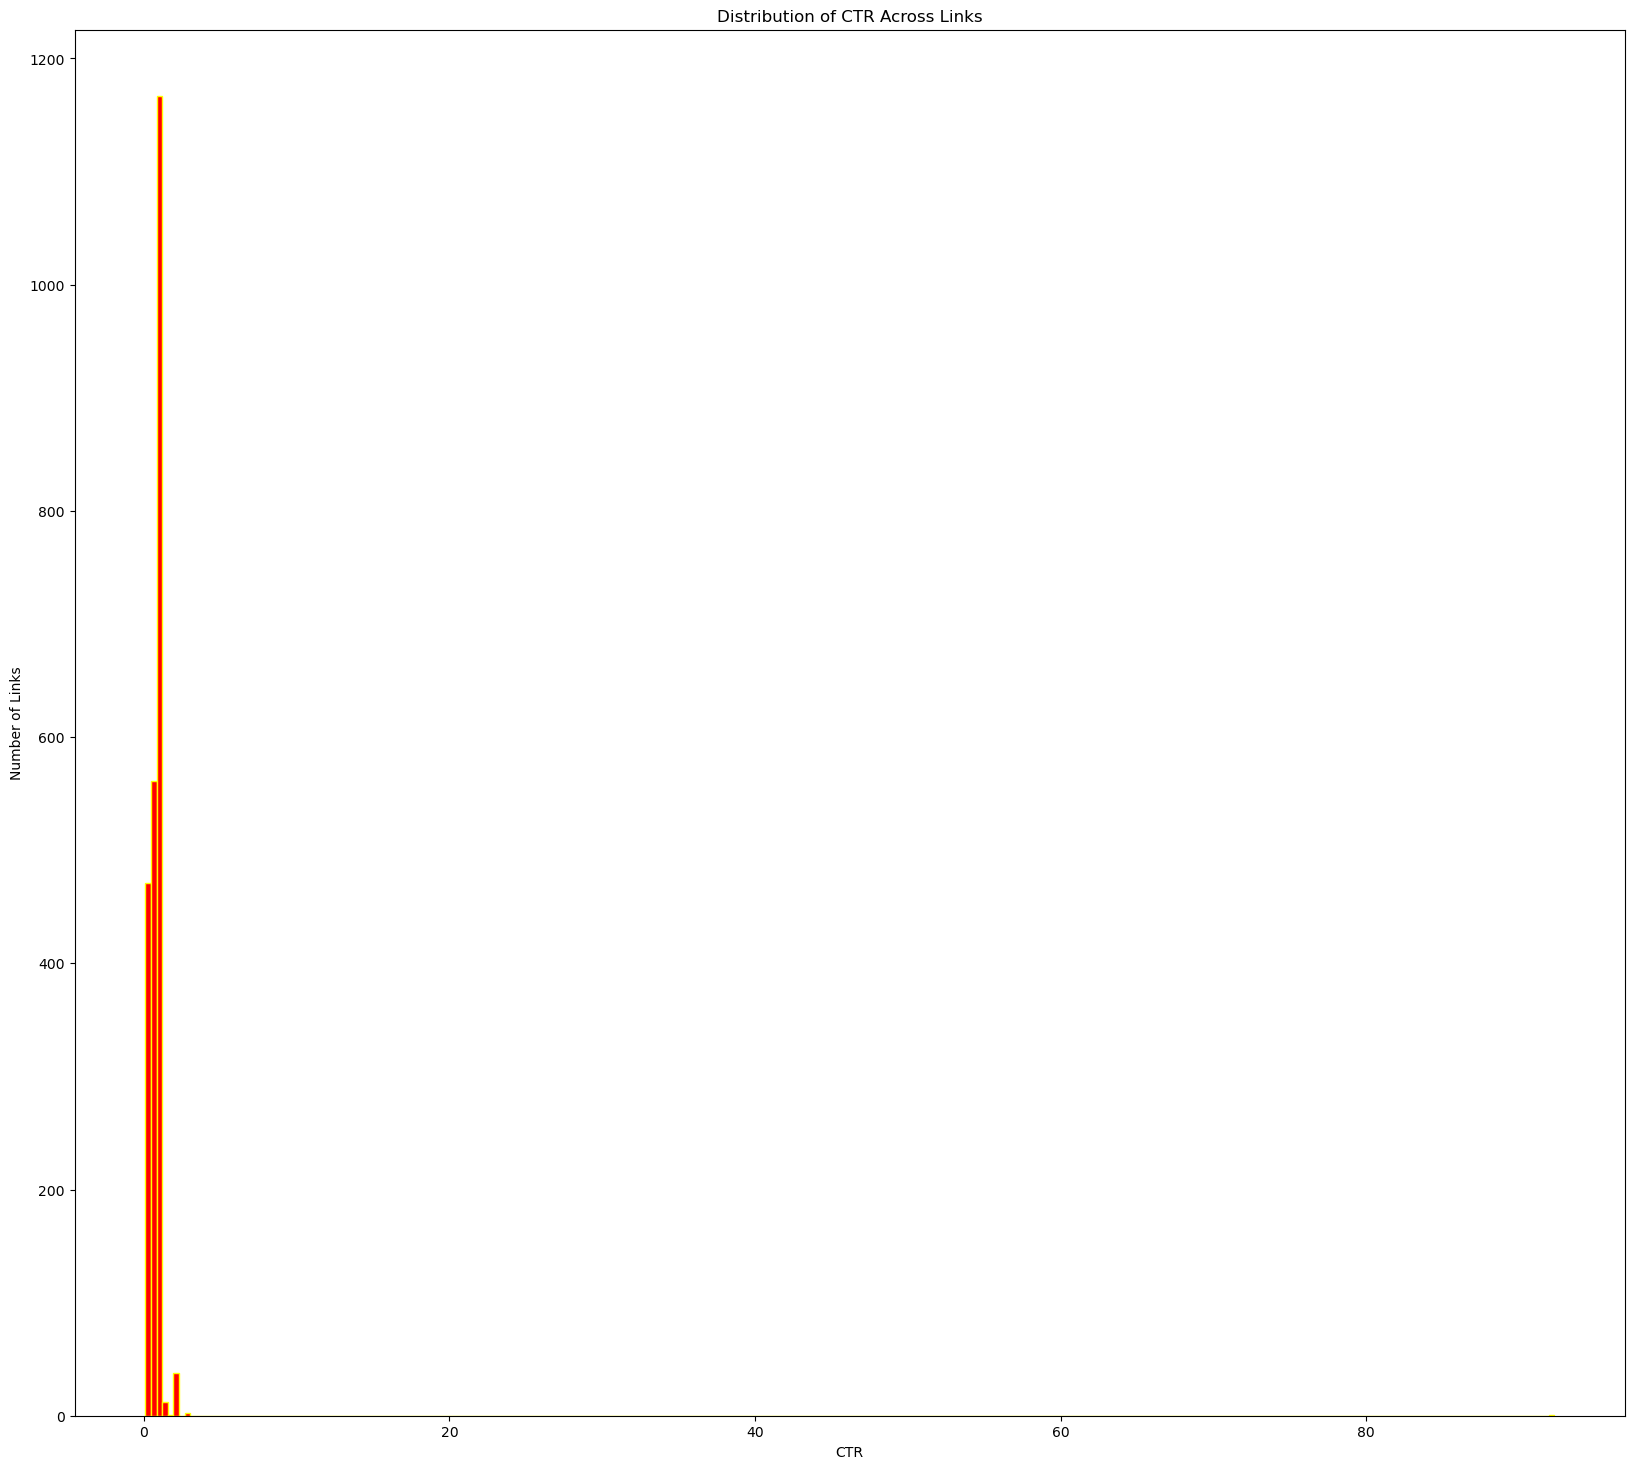

In [37]:
plt.figure(figsize=(20, 18))
plt.hist(ctr_data['CTR'], bins=250, color='red', edgecolor='yellow')
plt.title('Distribution of CTR Across Links')
plt.xlabel('CTR')
plt.ylabel('Number of Links')
plt.show()

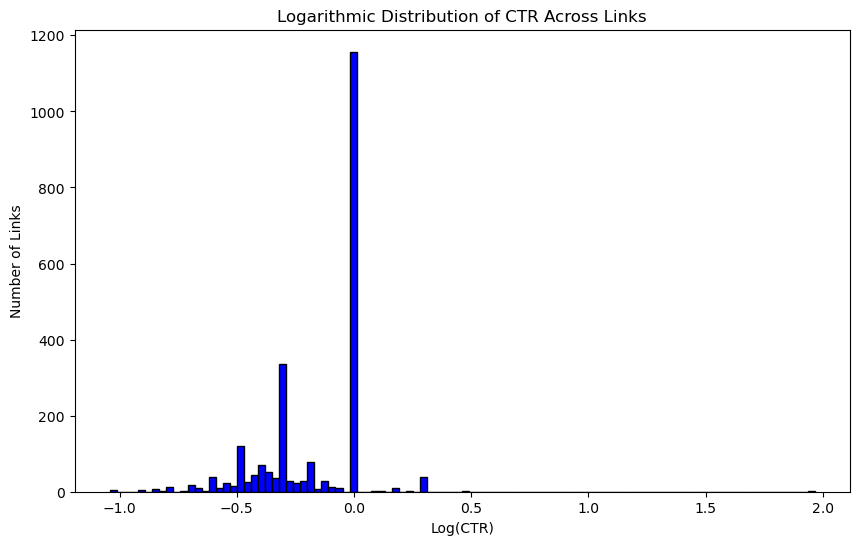

In [38]:
ctr_data['log_CTR'] = np.log10(ctr_data['CTR'] + 1e-9)

# Plot the log-transformed CTR values
plt.figure(figsize=(10, 6))
plt.hist(ctr_data['log_CTR'], bins=100, color='blue', edgecolor='black')
plt.title('Logarithmic Distribution of CTR Across Links')
plt.xlabel('Log(CTR)')
plt.ylabel('Number of Links')
plt.show()

In [39]:
# 5. Correlation Analysis

In [40]:
preview_count_per_link = df[df['event'] == 'preview'].groupby('linkid').size().reset_index(name='previews')

In [41]:
preview_count_per_link

,linkid,previews
0,006af6a0-1f0d-4b0c-93bf-756af9071c06,11
1,00759b81-3f04-4a61-b934-f8fb3185f4a0,1
2,00829040-ee01-4409-966d-d67c7965144a,9
3,00de7566-f014-4d20-8616-82e4dea45b88,1
4,0211bf4d-0e9d-46c2-889c-f97872280820,141
...,...,...
490,fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,101
491,fe24ad63-e347-40db-8e75-94e573bd3d9b,1
492,fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,57
493,fe8f7a23-be9d-49a6-b9b5-d26823c3f911,22


In [42]:
ctr_preview_click = pd.merge(click_count_per_link, preview_count_per_link, on='linkid', how='left')

In [43]:
ctr_preview_click

,linkid,clicks,previews
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,NaN
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,NaN
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,NaN
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,11.0
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,1.0
...,...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,21.0
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,NaN
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1,NaN
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,NaN


In [44]:
ctr_preview_click.isnull().sum()

linkid         0
clicks         0
previews    1791
dtype: int64

In [45]:
ctr_preview_click['previews'] = ctr_preview_click['previews'].fillna(0)

In [46]:
ctr_preview_click.isnull().sum()

linkid      0
clicks      0
previews    0
dtype: int64

In [47]:
ctr_preview_click

,linkid,clicks,previews
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,0.0
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,0.0
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,0.0
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,11.0
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,1.0
...,...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,21.0
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,0.0
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1,0.0
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,0.0


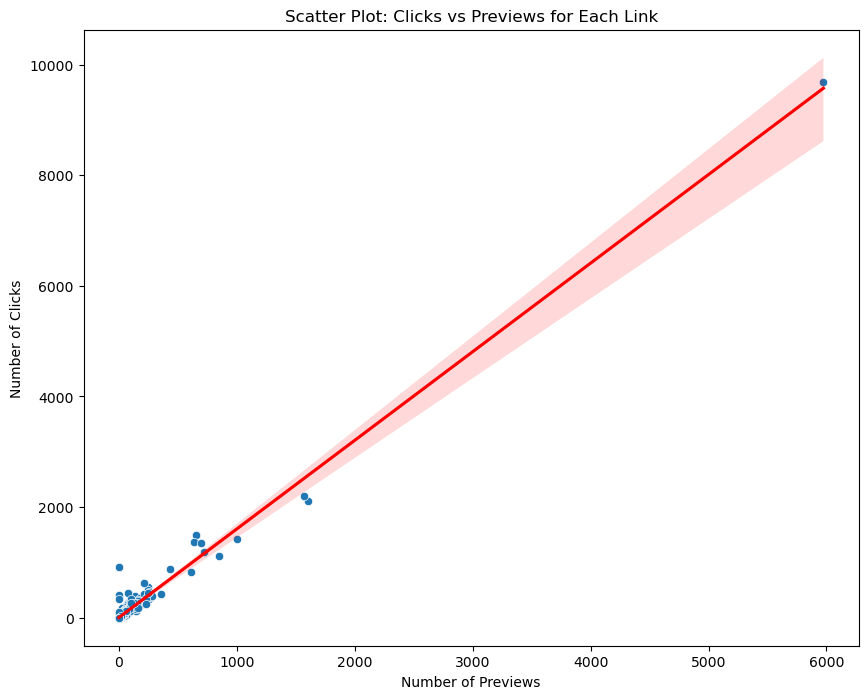

In [48]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='previews', y='clicks',data=ctr_preview_click)
sns.regplot(x='previews', y='clicks', data=ctr_preview_click, scatter=False, color='red')
plt.title('Scatter Plot: Clicks vs Previews for Each Link')
plt.xlabel('Number of Previews')
plt.ylabel('Number of Clicks')
plt.show()

In [49]:
pearson_corr, pearson_p_value = pearsonr(ctr_preview_click['previews'], ctr_preview_click['clicks'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {pearson_p_value}")

Pearson Correlation Coefficient: 0.9886850426804498
P-value: 0.0


In [50]:
from scipy.stats import spearmanr

spearman_corr, spearman_p_value = spearmanr(ctr_preview_click['previews'], ctr_preview_click['clicks'])

print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-value: {spearman_p_value}")

Spearman Correlation Coefficient: 0.7034731415371213
P-value: 0.0


In [51]:
if pearson_p_value < 0.05:
    print("The Pearson correlation is statistically significant.")
else:
    print("The Pearson correlation is NOT statistically significant.")

The Pearson correlation is statistically significant.


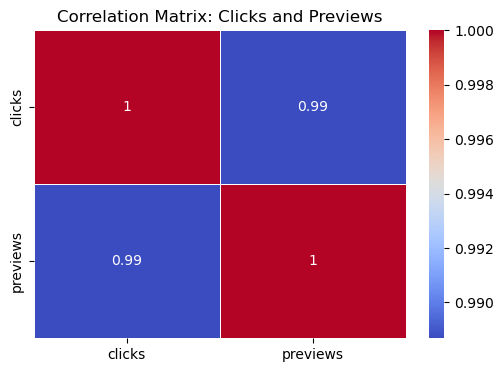

In [52]:
corr_matrix = ctr_preview_click[['clicks', 'previews']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Clicks and Previews')
plt.show()

In [53]:
# If Click increases by 1 then Previews increases by 0.99. That's High correlation between click and Preview